In [75]:
import pandas as pd
from prophet import Prophet

In [76]:
# Read the raw data
# Everything before the train_test_split is called "raw data"
raw_data = pd.read_csv('./data/ULEV Registrations As of 2022.csv')

# Clean up and reorganize data

# Store the geographical correspondence seperately
geo_data = raw_data.filter(regex=r'ONS Code|ONS Geography|ONS Sort')
# Strip whitespaces in geographic regions
geo_data['ONS Geography [note 6]'].str.lstrip()
# Renmae columns
geo_data = geo_data.rename(columns={"ONS Geography [note 6]": "geo", "ONS Code": "code", "ONS Sort": "sort"})

# The real data used to train the models
# We only care about the ONS Geography or the quarterly registration
raw_data = raw_data.filter(regex=r'ONS Code|Q')

# Melt the data to put quarter as a number instead of a column
raw_data = raw_data.melt(id_vars='ONS Code', var_name='Quarter', value_name='val')
# Extract the digits out of the quarter
raw_data['Quarter'] = raw_data['Quarter'].str.extract('(\d+)', expand=False).astype(int)
# Rename the columns
raw_data = raw_data.rename(columns={"Quarter": "quarter", "ONS Code": "code"})

# Sort the data by quarter
raw_data = raw_data.sort_values(['quarter'])

In [84]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# test out on the first region

raw_data = raw_data.rename(columns = {"quarter": "ds", "val": "y"})

raw_data_train, raw_data_test = train_test_split(raw_data, test_size = 0.1, shuffle = False)


for code in raw_data["code"]:
    train = raw_data_train[raw_data_train['code'] == code].drop(columns = ["code"])
    test = raw_data_test[raw_data_test['code'] == code].drop(columns = ["code"])
    train["ds"] = pd.date_range(start='1/10/2011', periods=37, freq = "Q")
    
    m = Prophet(changepoint_prior_scale=2).fit(train)
    future = m.make_future_dataframe(periods=4, freq="Q")
    print(future.shape)
    fcst = m.predict(future)
    
    print(test["y"])
    print(fcst["yhat"].tail(4))
    
    print(metrics.r2_score(test["y"], fcst["yhat"].tail(4)))

16:45:01 - cmdstanpy - INFO - Chain [1] start processing
16:45:01 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:01 - cmdstanpy - INFO - Chain [1] start processing


1683    43
1262    49
841     64
420     88
Name: y, dtype: int64
37    30.669382
38    32.599436
39    35.119473
40    35.943630
Name: yhat, dtype: float64
-2.287705768262517


16:45:01 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:02 - cmdstanpy - INFO - Chain [1] start processing


1395    144
974     166
553     201
132     216
Name: y, dtype: int64
37    145.855230
38    159.950150
39    163.724181
40    173.590027
Name: yhat, dtype: float64
-0.003539292273736505


16:45:02 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:03 - cmdstanpy - INFO - Chain [1] start processing


1396     81
975      91
554     104
133     128
Name: y, dtype: int64
37    74.470131
38    77.924353
39    79.972190
40    84.074269
Name: yhat, dtype: float64
-1.1974291398697372


16:45:03 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:03 - cmdstanpy - INFO - Chain [1] start processing
16:45:03 - cmdstanpy - INFO - Chain [1] done processing


1397    104
976     116
555     137
134     164
Name: y, dtype: int64
37    82.742917
38    88.149813
39    92.876266
40    99.509141
Name: yhat, dtype: float64
-2.531224901678235
(41, 1)


16:45:03 - cmdstanpy - INFO - Chain [1] start processing


1398    65
977     74
556     79
135     92
Name: y, dtype: int64
37    47.857915
38    47.699011
39    54.057419
40    60.294672
Name: yhat, dtype: float64
-5.8581451191694


16:45:04 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:04 - cmdstanpy - INFO - Chain [1] start processing
16:45:04 - cmdstanpy - INFO - Chain [1] done processing


1399     76
978      75
557      88
136     111
Name: y, dtype: int64
37    55.748161
38    59.672646
39    64.668440
40    69.536443
Name: yhat, dtype: float64
-2.458564805202292
(41, 1)


16:45:05 - cmdstanpy - INFO - Chain [1] start processing
16:45:05 - cmdstanpy - INFO - Chain [1] done processing


1400     90
979     104
558     106
137     127
Name: y, dtype: int64
37    76.503864
38    78.143486
39    81.776095
40    85.610769
Name: yhat, dtype: float64
-3.5088672828008356
(41, 1)


16:45:05 - cmdstanpy - INFO - Chain [1] start processing


1401    35
980     42
559     51
138     53
Name: y, dtype: int64
37    31.961059
38    34.393492
39    34.269111
40    36.749311
Name: yhat, dtype: float64
-1.9274330431767082


16:45:05 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:06 - cmdstanpy - INFO - Chain [1] start processing
16:45:06 - cmdstanpy - INFO - Chain [1] done processing


1402    41
981     42
560     50
139     62
Name: y, dtype: int64
37    35.447599
38    38.213993
39    39.737454
40    40.943056
Name: yhat, dtype: float64
-1.1003633124184473
(41, 1)


16:45:06 - cmdstanpy - INFO - Chain [1] start processing


1403    2544
982     3513
561     4806
140     6297
Name: y, dtype: int64
37    2448.312563
38    2644.860315
39    2711.815595
40    2779.614917
Name: yhat, dtype: float64
-1.2047843075246103


16:45:07 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:07 - cmdstanpy - INFO - Chain [1] start processing


1404    52
983     63
562     66
141     71
Name: y, dtype: int64
37    52.377690
38    56.672948
39    59.900141
40    65.365045
Name: yhat, dtype: float64
0.4374472316559891


16:45:07 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:07 - cmdstanpy - INFO - Chain [1] start processing


1394    636
973     710
552     816
131     953
Name: y, dtype: int64
37    566.272528
38    603.510570
39    626.235894
40    659.456631
Name: yhat, dtype: float64
-1.433922308210335


16:45:08 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:08 - cmdstanpy - INFO - Chain [1] start processing


1405     61
984      75
563      82
142     100
Name: y, dtype: int64
37    55.869553
38    61.563192
39    63.042956
40    67.013678
Name: yhat, dtype: float64
-1.096750613416475


16:45:08 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:09 - cmdstanpy - INFO - Chain [1] start processing


1407    191
986     210
565     218
144     249
Name: y, dtype: int64
37    262.565801
38    270.160541
39    263.368353
40    266.540268
Name: yhat, dtype: float64
-5.346801729306043


16:45:09 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:09 - cmdstanpy - INFO - Chain [1] start processing


1408    2120
987     2993
566     4327
145     5746
Name: y, dtype: int64
37    1923.260894
38    2063.357498
39    2131.580517
40    2188.117915
Name: yhat, dtype: float64
-1.4384101466364485


16:45:10 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:10 - cmdstanpy - INFO - Chain [1] start processing


1409    6532
988     7794
567     8343
146     9828
Name: y, dtype: int64
37    7034.891716
38    7739.801765
39    8785.927228
40    9120.632062
Name: yhat, dtype: float64
0.8297763106111233


16:45:11 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:11 - cmdstanpy - INFO - Chain [1] start processing


1410    647
989     699
568     723
147     818
Name: y, dtype: int64
37    2964.011860
38    3161.747373
39    3856.598280
40    3645.912873
Name: yhat, dtype: float64
-1901.977927671402


16:45:11 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:11 - cmdstanpy - INFO - Chain [1] start processing


1411    389
990     483
569     561
148     734
Name: y, dtype: int64
37    386.641857
38    402.400563
39    417.307297
40    421.883018
Name: yhat, dtype: float64
-0.942867019701197


16:45:12 - cmdstanpy - INFO - Chain [1] done processing


(41, 1)


16:45:12 - cmdstanpy - INFO - Chain [1] start processing


1412    134
991     164
570     210
149     234
Name: y, dtype: int64
37    111.900835
38    116.948204
39    122.501655
40    133.752916
Name: yhat, dtype: float64
-2.363718948419286


KeyboardInterrupt: 

16:23:17 - cmdstanpy - INFO - Chain [1] start processing
16:23:17 - cmdstanpy - INFO - Chain [1] done processing


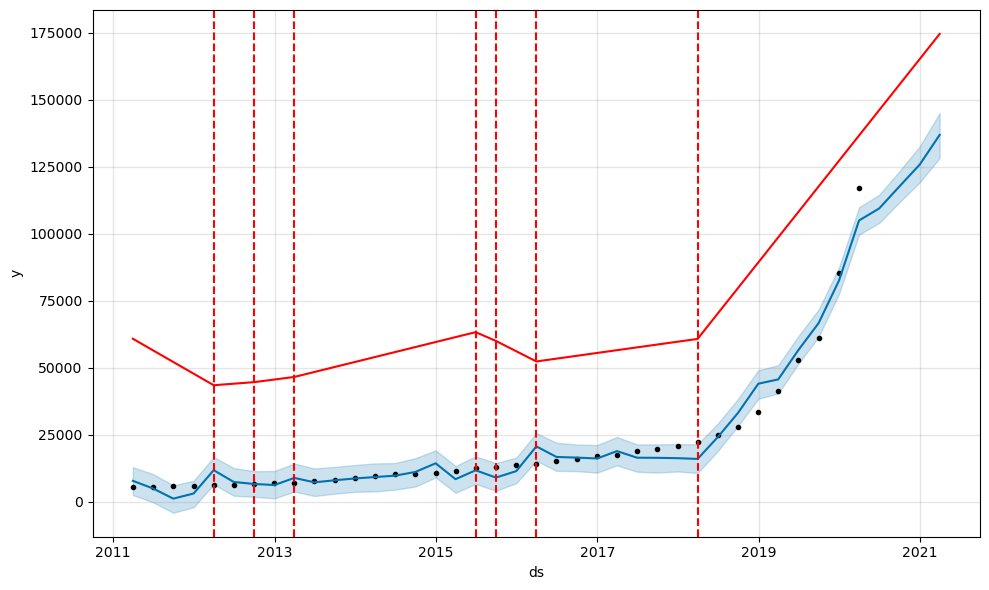

In [67]:
from prophet.plot import add_changepoints_to_plot

m = Prophet(changepoint_prior_scale=1).fit(train)
future = m.make_future_dataframe(periods=4, freq="Q")
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)